## Dataset generation

In [1]:
Train_path="./CovidDataset/Train"
Val_path="./CovidDataset/Val"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Using TensorFlow backend.


## CNN based model

In [3]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

## Training

In [5]:
train_datagen= image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip= True,
)

test_dataset=image.ImageDataGenerator(rescale=1./255)

In [6]:
train_generator= train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 224 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [8]:
validation_generator=train_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'   
)

Found 60 images belonging to 2 classes.


In [9]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 61s 8s/step - loss: 0.7168 - accuracy: 0.5781 - val_loss: 0.6277 - val_accuracy: 0.8500
Epoch 2/10
8/8 [==============================] - 56s 7s/step - loss: 0.4428 - accuracy: 0.7539 - val_loss: 0.3936 - val_accuracy: 0.8833
Epoch 3/10
8/8 [==============================] - 56s 7s/step - loss: 0.3728 - accuracy: 0.8281 - val_loss: 0.4329 - val_accuracy: 0.9167
Epoch 4/10
8/8 [==============================] - 57s 7s/step - loss: 0.2862 - accuracy: 0.8867 - val_loss: 0.2485 - val_accuracy: 0.9333
Epoch 5/10
8/8 [==============================] - 56s 7s/step - loss: 0.2084 - accuracy: 0.8945 - val_loss: 0.1820 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 57s 7s/step - loss: 0.1478 - accuracy: 0.9453 - val_loss: 0.0962 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 61s 8s/step - loss: 0.1622 - accuracy: 0.9453 - val_loss: 0.1247 - val_accuracy: 0.9500
Epoch 8/10
8/8 [==================

## Accuracy

In [11]:
model.evaluate_generator(train_generator)


[0.21175046265125275, 0.9821428656578064]

In [12]:
model.evaluate_generator(validation_generator)


[0.2209753692150116, 0.9833333492279053]

In [13]:
print("training_accuracy", hist.history['accuracy'][-1])
print("validation_accuracy", hist.history['val_accuracy'][-1])

training_accuracy 0.9453125
validation_accuracy 0.9833333492279053


## Visualization

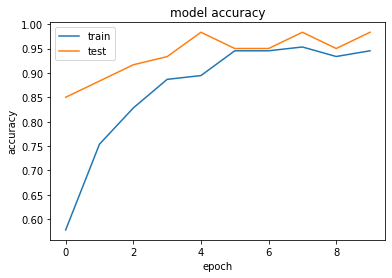

In [14]:
#ACCURACY

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

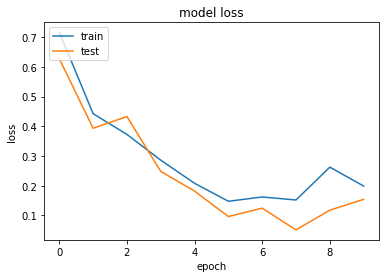

In [15]:
#LOSS

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:

label = validation_generator.classes

pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'Covid': 0, 'Normal': 1}
['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid']


In [17]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(predicted_class_indices,label)
cf

array([[30, 30],
       [ 0,  0]])

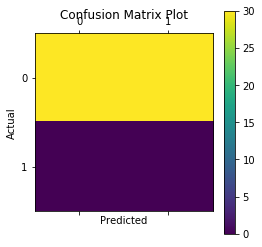

In [18]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();